In [1]:
import pandas as pd

In [ ]:
df=pd.read_csv("Student Performance_PCA/student-por.csv")

In [3]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
df.shape

(649, 33)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss=StandardScaler()
numerical_col=df.select_dtypes(exclude='object')

In [8]:
numerical_col.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [9]:
target_column=df['G3']


In [10]:
df.drop('G3',axis=1,inplace=True)

In [11]:
numerical_col2=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',]
for i in numerical_col2:
    df[[i]]=ss.fit_transform(df[[i]])
    

In [12]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,1.031695,U,GT3,A,1.310216,1.540715,at_home,teacher,...,no,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-4.155470,-0.195820
1,GP,F,0.210137,U,GT3,T,-1.336039,-1.188832,at_home,other,...,no,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.874570,-0.195820
2,GP,F,-1.432980,U,LE3,T,-1.336039,-1.188832,at_home,other,...,no,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.219064,0.491137
3,GP,F,-1.432980,U,GT3,T,1.310216,-0.278983,health,services,...,yes,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.948153,0.834615
4,GP,F,-0.611422,U,GT3,T,0.428131,0.630866,other,other,...,no,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,-0.145481,0.491137


In [13]:
from sklearn.decomposition import PCA

In [14]:
pca=PCA(n_components=3)
X_pca=pca.fit_transform(df[numerical_col2])

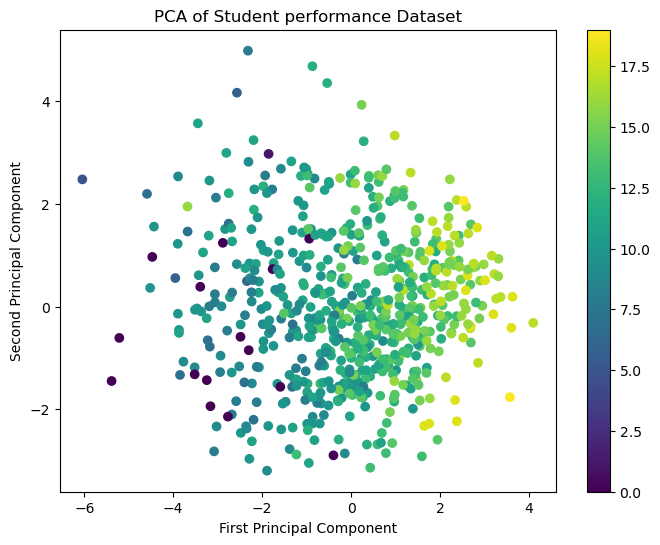

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target_column, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Student performance Dataset')
plt.colorbar(scatter)
plt.show()


In [16]:
len(X_pca[0])

3

In [17]:
pca_updated=PCA(n_components=4)
X_pca2=pca_updated.fit_transform(df[numerical_col2])

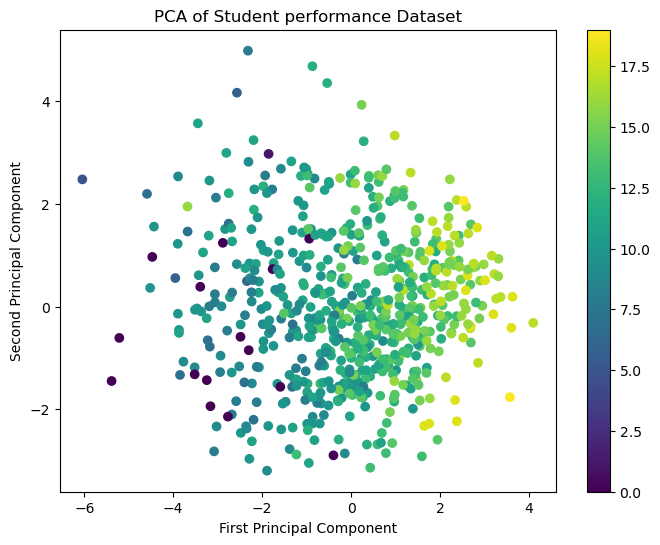

In [18]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target_column, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Student performance Dataset')
plt.colorbar(scatter)
plt.show()


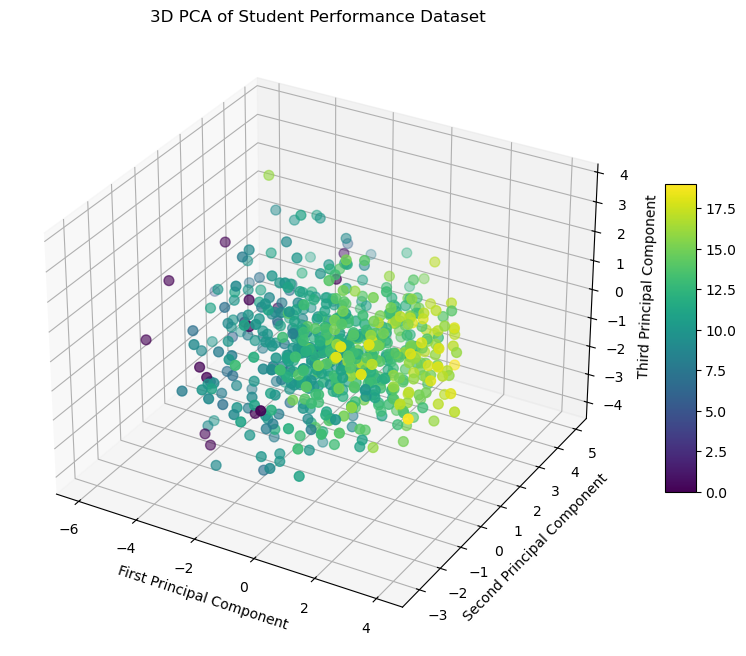

In [19]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],c=target_column, cmap='viridis', s=50)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('3D PCA of Student Performance Dataset')

fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
plt.show()

In [20]:
len(X_pca2[0])

4

In [21]:
loadings=pd.DataFrame(pca.components_.T,columns=[f'PC{i+1}' for i in range(3)],index=numerical_col2)

In [22]:
print(loadings['PC1'].abs().sort_values(ascending=False).head(10))

G1            0.454834
G2            0.451050
failures      0.324578
Medu          0.276077
Dalc          0.270568
Walc          0.265537
Fedu          0.242098
studytime     0.232106
age           0.200499
traveltime    0.181554
Name: PC1, dtype: float64


In [23]:
print(loadings['PC2'].abs().sort_values(ascending=False).head(10))

Walc          0.457966
Fedu          0.418114
Dalc          0.397564
Medu          0.394384
goout         0.383290
freetime      0.225142
traveltime    0.162545
absences      0.150552
G2            0.113497
G1            0.112987
Name: PC2, dtype: float64


In [24]:
print(loadings['PC3'].abs().sort_values(ascending=False).head(10))

freetime      0.434317
famrel        0.431204
goout         0.365378
absences      0.341282
Medu          0.309817
Fedu          0.302157
traveltime    0.238100
G1            0.184248
failures      0.176521
G2            0.172022
Name: PC3, dtype: float64
